# Assignment 3
### MRUDUL SUNIL PATIL
### 21BCE3386
##### VIT VELLORE

## **Task 1:**
 Download the dataset: https://drive.google.com/file/d/1AvRp8hOK-O76WIFvPj_rk10fAZbt8nWH/view

```Downloaded the dataset into './penguins_size.csv'```

## **Task 2:**
Load the dataset.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## **Task 3:**
 Perform the Below Visualizations.

● Univariate Analysis 

● Bi - Variate Analysis 

● Multivariate Analysis

## Univariate Analysis

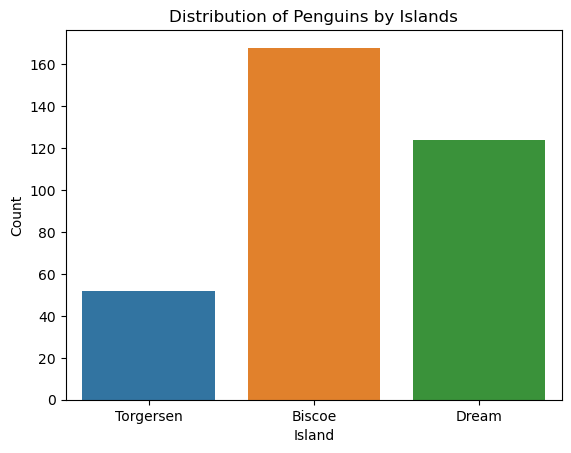

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x = "island", data = df)
plt.title('Distribution of Penguins by Islands')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()

## Bi - Variate Analysis

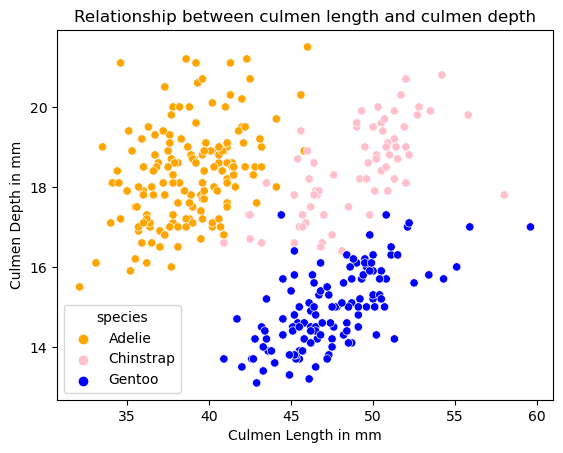

In [3]:
sns.scatterplot(x = df.culmen_length_mm, y = df.culmen_depth_mm, hue = df.species, palette=('Orange', 'Pink', 'Blue'))
plt.title('Relationship between culmen length and culmen depth')
plt.xlabel('Culmen Length in mm')
plt.ylabel('Culmen Depth in mm')
plt.show()

## Multivariate Analysis

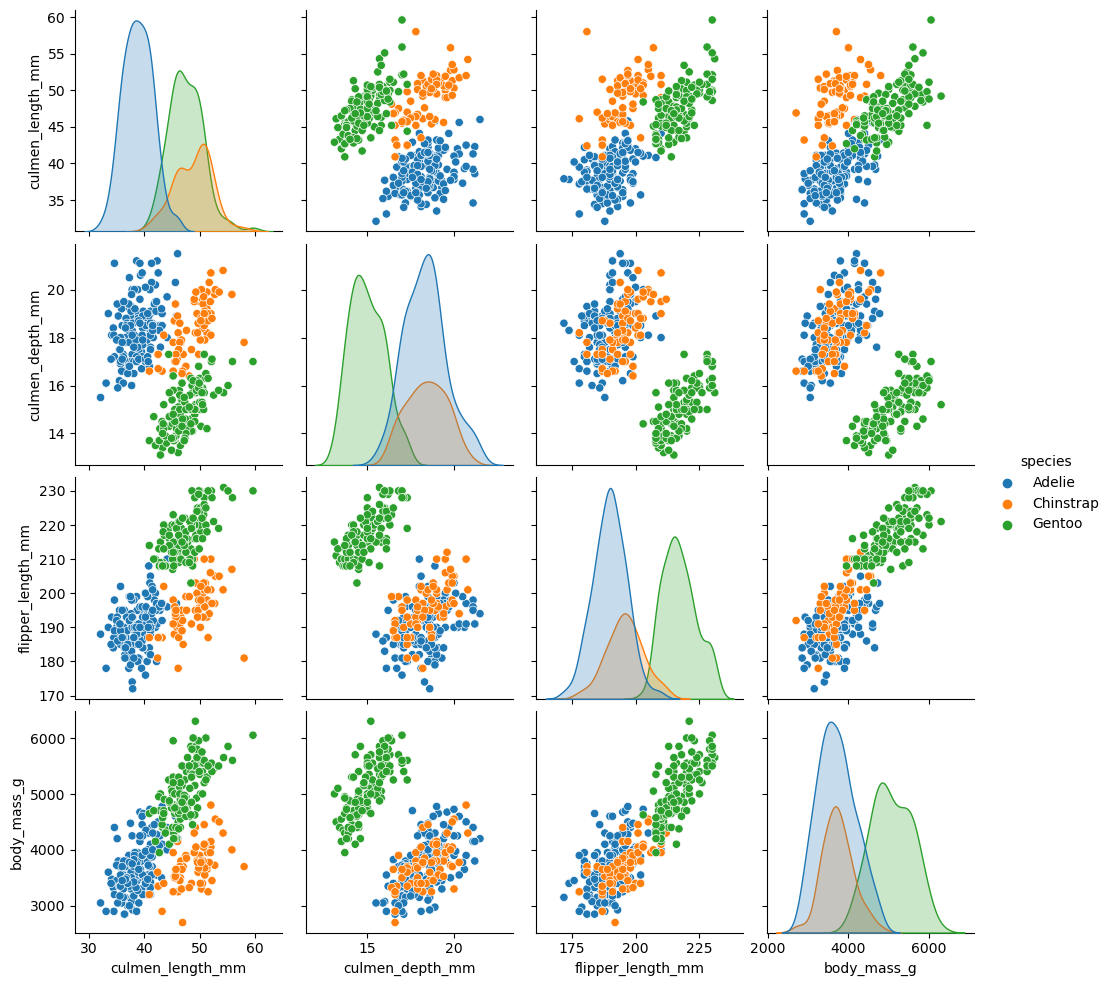

In [4]:
%matplotlib inline
sns.pairplot(df, hue="species")
plt.show()

## **Task 4:**
Perform descriptive statistics on the dataset.

In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## **Task 5:**
Check for Missing values and deal with them.

In [7]:
print(df.shape)
print(df.drop_duplicates().shape )

(344, 7)
(344, 7)


No Duplicates

In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)

df['sex'].fillna(df['sex'].mode().iloc[0],inplace=True)

df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
print(df.sex.value_counts())

df[(df['sex']  != 'MALE') & (df['sex']  != 'FEMALE')]

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [11]:
df.drop(df[(df['sex']  != 'MALE') & (df['sex']  != 'FEMALE')].index, inplace = True)

print(df.sex.value_counts())

MALE      178
FEMALE    165
Name: sex, dtype: int64


## **Task 6:**
Find the outliers and replace them outliers

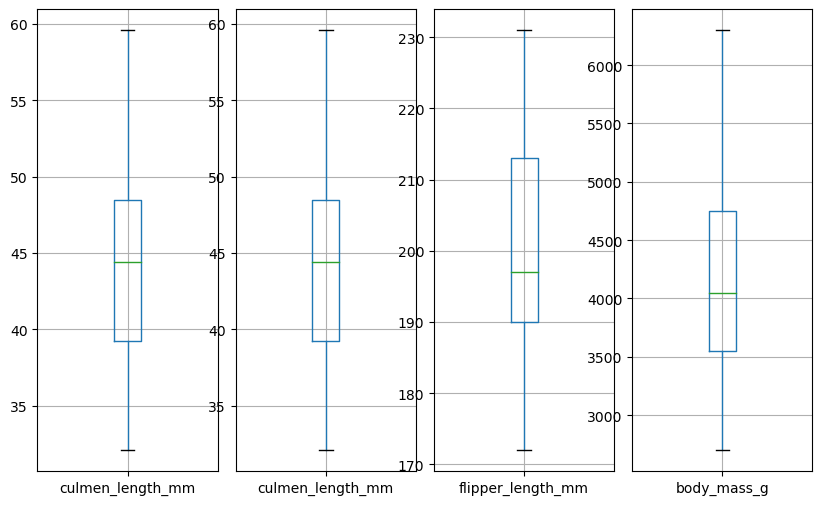

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(10, 6))

df.boxplot('culmen_length_mm', ax=ax[0])
df.boxplot('culmen_length_mm', ax=ax[1])
df.boxplot('flipper_length_mm', ax=ax[2])
df.boxplot('body_mass_g', ax=ax[3])

plt.subplots_adjust(wspace=0.1) 

plt.show()

 NO OUTLIERS FOUND IN THIS DATASET 

#### ***Task 7 after Task 8***

## **Task 8:**
Check for Categorical columns and perform encoding.

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


## **Task 7:**
Check the correlation of independent variables with the target

In [14]:
df.corr().species.sort_values()

culmen_depth_mm     -0.740849
island              -0.634561
sex                  0.006870
culmen_length_mm     0.729910
body_mass_g          0.746940
flipper_length_mm    0.850215
species              1.000000
Name: species, dtype: float64

## **Task 9:**
Split the data into dependent and independent variables.

In [15]:
#independent

X=df.drop(columns=['species'],axis=1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


In [16]:
#dependent

y=df['species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

## **Task 10:**
Scaling the data

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalised = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_normalised.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


## **Task 11:**
Split the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_normalised,y,test_size=0.25,random_state=1)

## **Task 12:**
check the training and testing data shape.

In [19]:
print("Shapes")
print("X_train = {}".format(X_train.shape))
print("X_test = {}".format(X_test.shape))
print("y_train = {}".format(y_train.shape))
print("y_test = {}".format(y_test.shape))

Shapes
X_train = (257, 6)
X_test = (86, 6)
y_train = (257,)
y_test = (86,)
